In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def covariance(x,y):
    return np.cov(x,y)[0][1]
def variance(x):
    return np.var(x)
def mean(x):
    return np.mean(x)

# Linear regression

In [77]:
class LinearRegression:
# A closed form solution, for y = B0 + B1 * x, where            
# Solving parameters for derivative of RMSE?
    B0 = None
    B1 = None
        
    def fit(self, x_arr,y_arr):
        self.B1 = covariance(x_arr,y_arr)/variance(x_arr)
        self.B0 = mean(y_arr) - self.B1 *mean(x_arr)

    def predict(self, x_arr):
        y_arr = []
        for x in x_arr:
            y_arr.append(self.B0 + self.B1 * x)
        return y_arr
        
    def get_coefficients(self):
        return self.B0, self.B1  

In [78]:
LR = LinearRegression()
x = [0,1]
y = [2,3]
LR.fit(x,y)

In [79]:
LR.B0, LR.B1

(1.5, 2.0)

In [80]:
x_arr = range(10)
y_arr = LR.predict(x_arr)

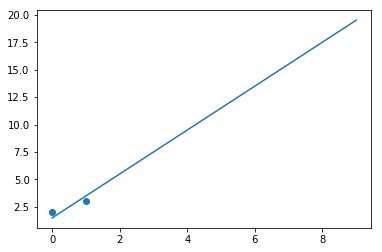

In [81]:
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()

# Logistic Regression

In [82]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def ll_gradient(features, target, predictions):
    return np.dot(features.T, target - predictions)

In [83]:
class LogisticRegression:
    
    weights = None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        if add_intercept:
            intercept = np.ones((features.shape[0], 1))
            features = np.hstack((intercept, features))

        weights = np.zeros(features.shape[1])

        for step in range(num_steps):
            scores = np.dot(features, weights)
            predictions = sigmoid(scores)

            gradient = ll_gradient(features, target, predictions)
            weights += lr * gradient

            # Print log-likelihood every so often
            if step % 10000 == 0:
                print(log_likelihood(features, target, weights))

        self.weights = weights
  
    def predict(self, features):
        scores = np.dot(np.hstack((np.ones((features.shape[0], 1)),
                                 features)), self.weights)
        return np.round(sigmoid(scores))

## Create and test on sample data

In [84]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

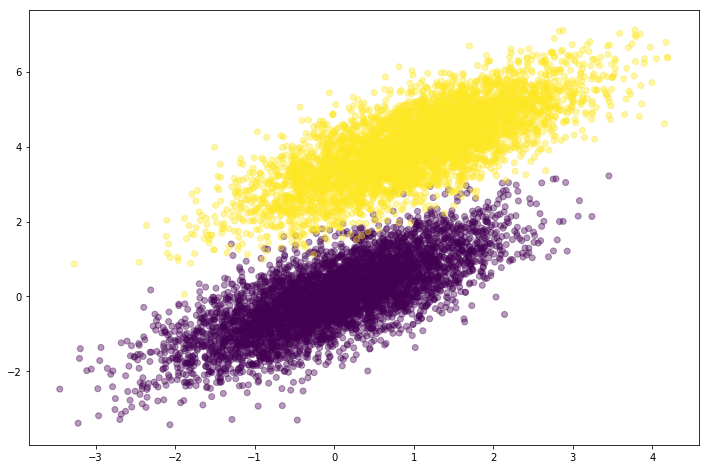

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [87]:
LogR = LogisticRegression()
LogR.fit(simulated_separableish_features, simulated_labels,
                     num_steps = 50000, lr = 5e-5, add_intercept=True)

-4346.26477915
-148.706722768
-142.964936231
-141.545303072
-141.060319659


In [88]:
LogR.weights

array([-13.58690551,  -4.8809644 ,   7.99812915])

In [89]:
preds = LogR.predict(simulated_separableish_features)
print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.9948


In [91]:
simulated_labels.shape

(10000,)

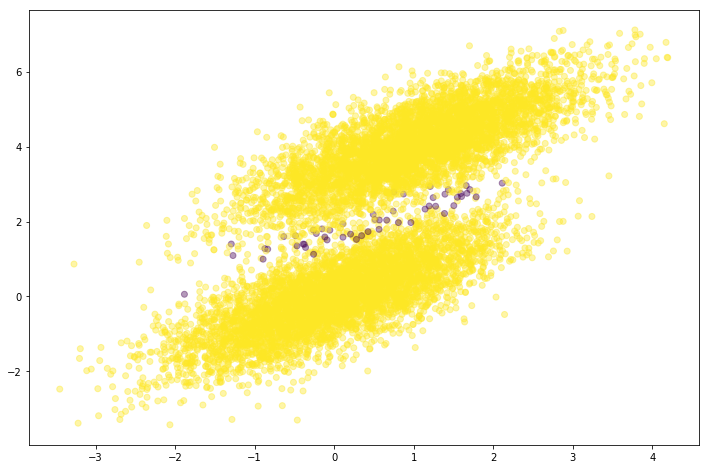

In [93]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds==simulated_labels, alpha = .4)